## Practice
1. Perform <b>Temporal Subtraction</b>. i.e., <i>abs(I(t)-I(t-1))</i> where <i>I(t)</i> is the captured image at time instant <i>t</i>.
2. Perform <b>Background Subtraction</b>. i.e., <i>abs(I(t)-I(0))</i> where <i>I(0)</i> is the first captured image after your program starts the execution.
3. Show the background image and both subtracted images.
4. Compare the differences. What is the pros and cons of these two methods?
5. Upload your Jupyter code file (*.ipynb)

# Compare the differences. What is the pros and cons of these two methods?
### Temporal Subtraction使用的公式為現在當下的影像frame(now)減去上一個frame(n-1)，所以顯示出的影像為正在移動中的東西，所以若整個畫面都沒動，將會顯示整個黑畫面。<br>而 Background Subtraction所使用的公式跟Temporal Subtraction類似，但更改為為frame(now)減去相機最一開始frame(0)的畫面，所以背景將會是最開始相機所捕捉到畫面，所以在接下來捕捉的畫面若影像跟第一個不一樣將會顯示出來
### 使用Temporal Subtraction比較適合對於只偵測當下在動的東西，而Background Subtraction比較適合抓取跟最一開始有無變化的畫面。
### 綜合比較
#### Temporal Subtraction
- 偵測即時再動的東西
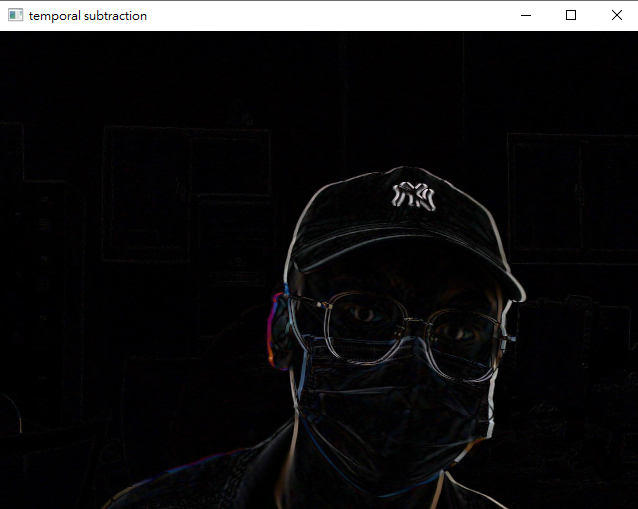
#### Background Subtraction
- 偵測當下和一開始之間的差距
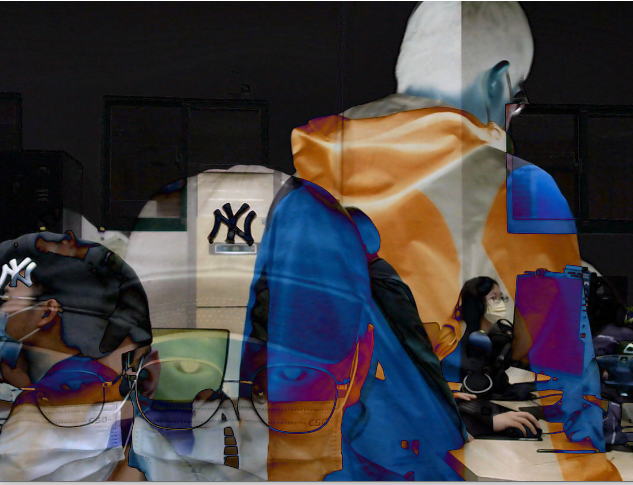


In [2]:
# Background Subtraction
import cv2
cap = cv2.VideoCapture(1)
# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")
cur_frame, prev_frame = None, None
i = 0
temp = None
while True:
    
    ret, frame = cap.read()
    prev_frame = cur_frame
    cur_frame = cv2.resize(frame, None, fx=1, fy=1, interpolation=cv2.INTER_AREA)
    if i == 0:
        temp  = cur_frame
        i = i+1
    if prev_frame is not None:
        sub_frame = cv2.absdiff(cur_frame , temp)
        cv2.imshow(' Background Subtraction', sub_frame)
    c = cv2.waitKey(1)
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
#temporal subtraction

import cv2
cap = cv2.VideoCapture(0)
# Check if the webcam is opened correctly
if not cap.isOpened():
    raise IOError("Cannot open webcam")
cur_frame, prev_frame = None, None
while True:
    ret, frame = cap.read()
    prev_frame = cur_frame
    cur_frame = cv2.resize(frame, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
    if prev_frame is not None:
        sub_frame = cv2.absdiff(cur_frame , prev_frame)
        cv2.imshow('temporal subtraction', sub_frame)
    c = cv2.waitKey(1)
    if c == 27:
        break
cap.release()
cv2.destroyAllWindows()